In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 10.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
print("📊 Ukuran dataset:", df.shape)
print(df.head())

📊 Ukuran dataset: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0        0  33.6   
1            1     85.0           66.0           29.0        0  26.6   
2            8    183.0           64.0           29.0        0  23.3   
3            1     89.0           66.0           23.0       94  28.1   
4            0    137.0           40.0           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# memisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
#Beberapa fitur bernilai 0 → tambahkan 1 agar tidak error saat log-transform
X_log = np.log1p(X)

In [ ]:
#Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#model svm
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, random_state=42)

In [ ]:
# Prediksi dan evaluasi
y_pred = svm_model.predict(X_test_scaled)

print("\n🎯 Akurasi:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Akurasi: 0.7142857142857143

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



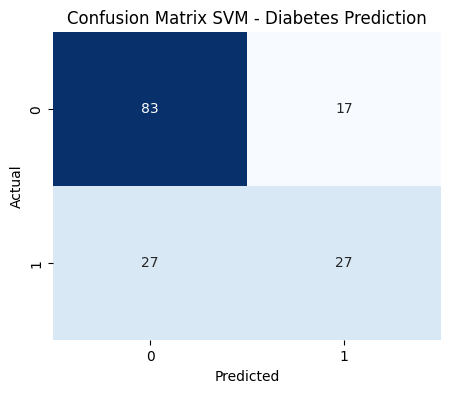

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM - Diabetes Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()